# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | coruripe
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | hengchun
Processing Record 15 of Set 1 | jabor
Processing Record 16 of Set 1 | ulaangom
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | vengerovo
Processing Record 19 of Set 1 | henley beach
Processing Record 20 of Set 1 | prince rupert
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | sirte
Processing R

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-22.77,98,12,1.79,RU,1709572299
1,bredasdorp,-34.5322,20.0403,17.53,88,71,8.81,ZA,1709572248
2,kodiak,57.7900,-152.4072,-1.27,100,100,2.57,US,1709572250
3,lompoc,34.6391,-120.4579,14.83,67,0,4.12,US,1709572265
4,coruripe,-10.1256,-36.1756,31.37,52,12,6.25,BR,1709572404


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-22.77,98,12,1.79,RU,1709572299
1,bredasdorp,-34.5322,20.0403,17.53,88,71,8.81,ZA,1709572248
2,kodiak,57.7900,-152.4072,-1.27,100,100,2.57,US,1709572250
3,lompoc,34.6391,-120.4579,14.83,67,0,4.12,US,1709572265
4,coruripe,-10.1256,-36.1756,31.37,52,12,6.25,BR,1709572404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

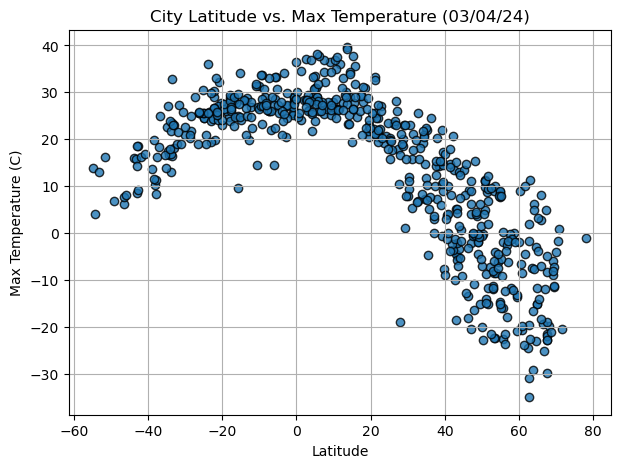

In [25]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

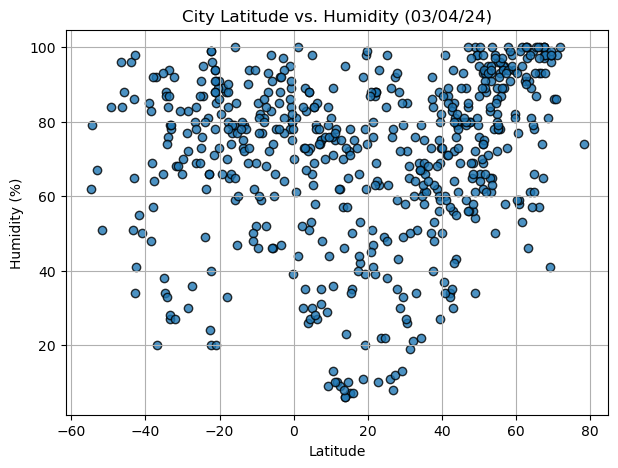

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

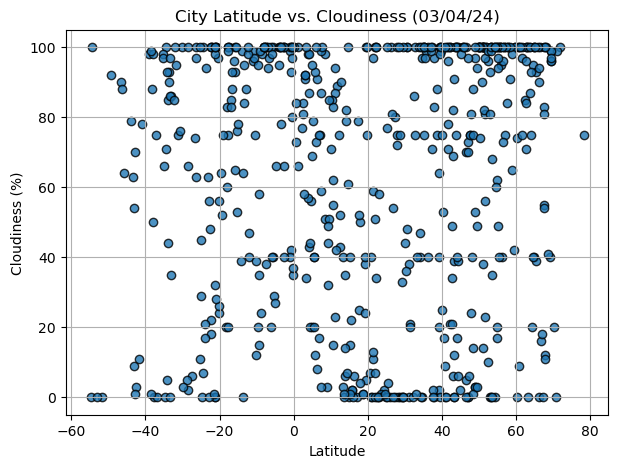

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

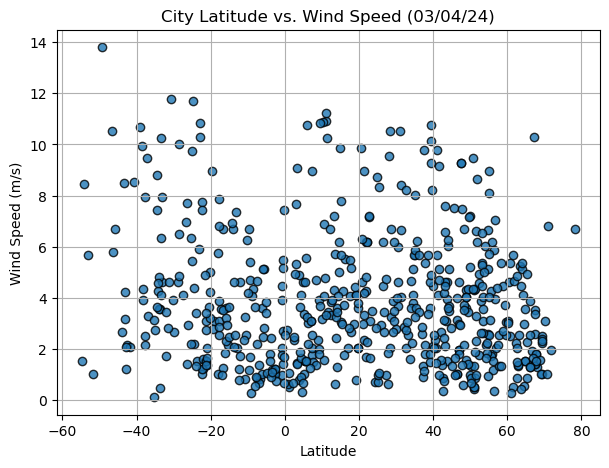

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 5))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-22.77,98,12,1.79,RU,1709572299
2,kodiak,57.7900,-152.4072,-1.27,100,100,2.57,US,1709572250
3,lompoc,34.6391,-120.4579,14.83,67,0,4.12,US,1709572265
6,isafjordur,66.0755,-23.1240,2.78,93,90,3.87,IS,1709572267
10,ust-nera,64.5667,143.2000,-22.94,99,95,0.55,RU,1709572303


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,17.53,88,71,8.81,ZA,1709572248
4,coruripe,-10.1256,-36.1756,31.37,52,12,6.25,BR,1709572404
5,port-aux-francais,-49.3500,70.2167,6.78,84,92,13.80,TF,1709572236
7,hermanus,-34.4187,19.2345,16.56,87,100,7.44,ZA,1709572258
8,grytviken,-54.2811,-36.5092,4.11,79,100,8.46,GS,1709572228


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.2006546348124621


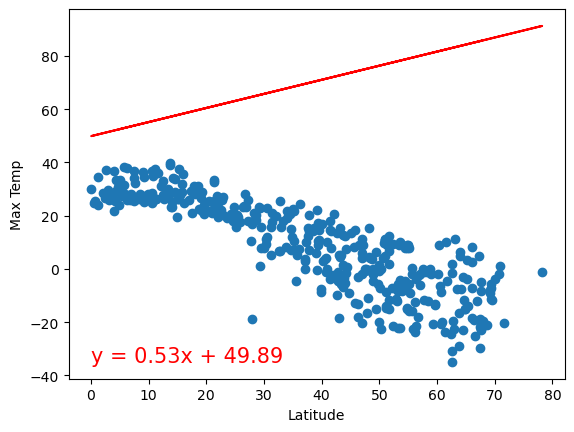

In [54]:
# Linear regression on Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Create the plot linear regression function for Nothern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print!
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.4745137695827974


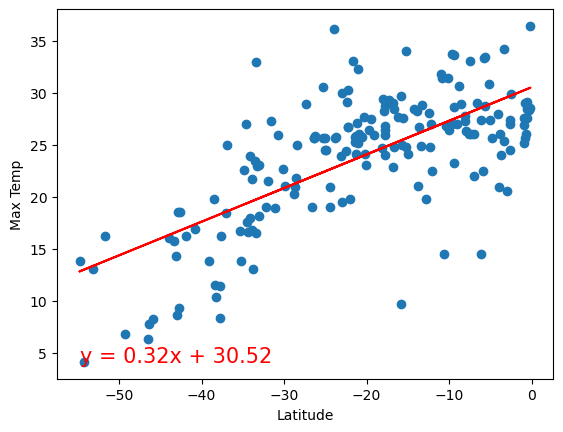

In [56]:
# Linear regression on Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Create the plot linear regression function for Southern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print!
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** The regression line slope for the Southern Hemisphere is positive, signifying an increase in maximum temperature as one approaches the equator. Conversely, in the Northern Hemisphere, the regression line's negative slope illustrates that maximum temperature decreases with increasing distance from the equator. These patterns affirm that temperatures are higher near the equator and decrease towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2006546348124621


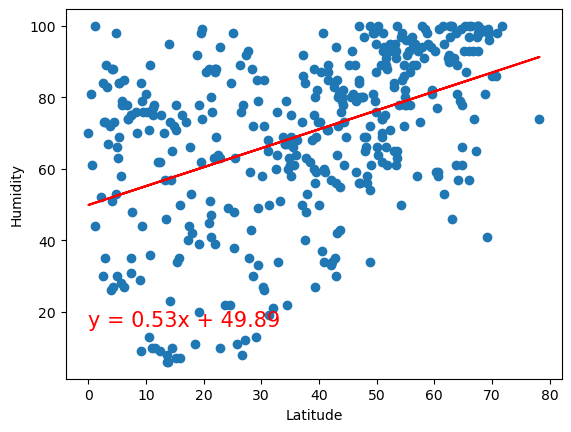

In [59]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values for the linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.024261451064020202


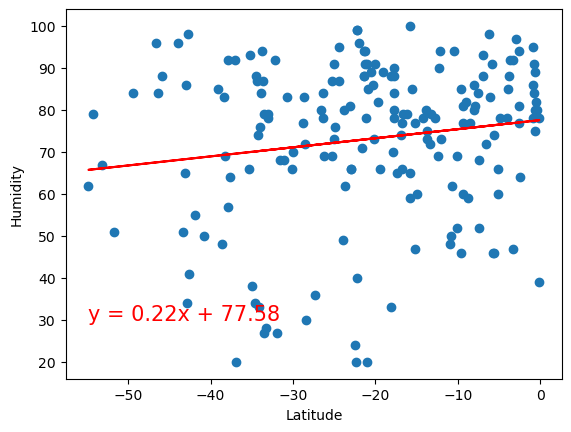

In [61]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values for the linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Create the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Label the scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the linear regression analysis shows a positive slope, due to the common expectation that there is a slight increase in humidity as one moves from the equator towards the poles. As for the southern hemisphere, the linear regression between humidity and latitude, displays a slight positive slope, suggesting that humidity increases as one moves closer to the equator. The r-squared value would be crucial in determining the strength of the relationship between latitude and humidity. The strength of these relationships is gauged by the r-squared value, with a higher value in the Southern Hemisphere suggesting a more uniform pattern in humidity distribution relative to latitude.tude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04221767784533342


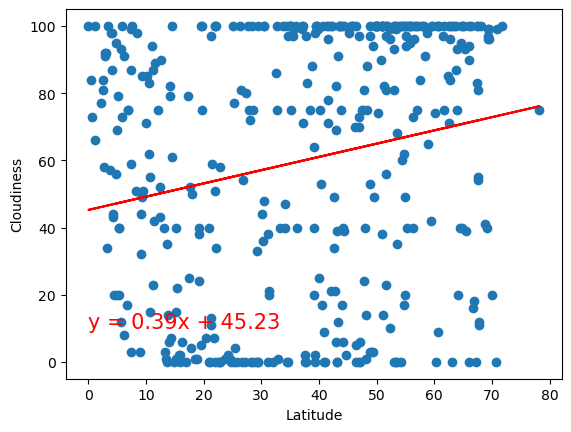

In [63]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.05216173683578757


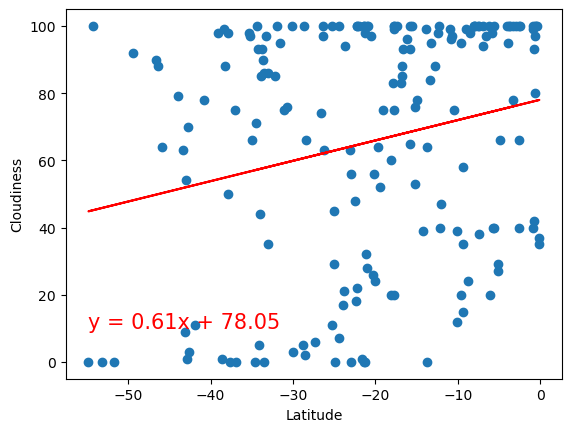

In [65]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)+10), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** 
The regression analysis for both the Northern and Southern Hemispheres reveals a positive slope, indicating a slight increase in cloudiness with latitude in both directions from the equator.However, the low r-squared value, particularly noted in the Northern Hemisphere as "0.04221767784533342", underscores that latitude is not a significant predictor of cloudiness levels. This suggests that other factors beyond latitude play a crucial role in determining cloudiness across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013953424550717432


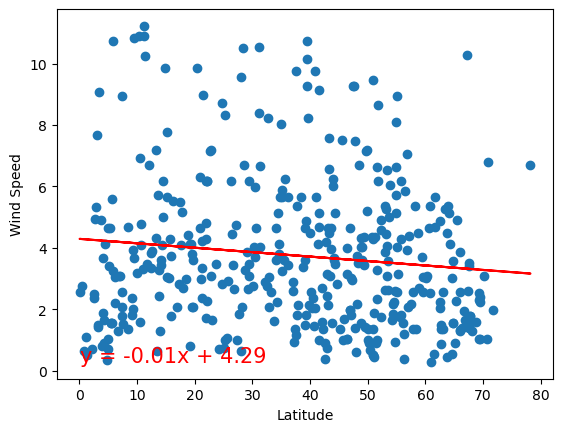

In [68]:
# Northern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

The r-squared is: 0.1352535191510907


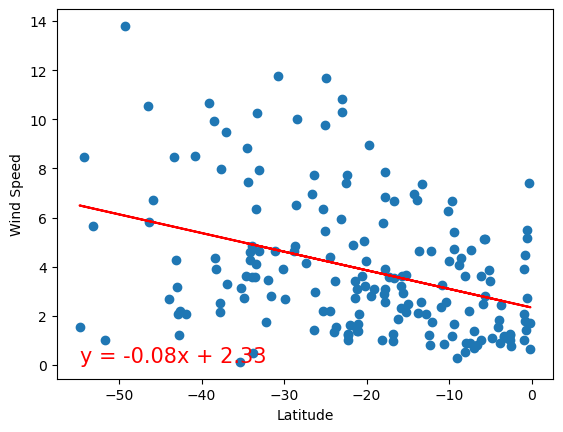

In [70]:
# Southern Hemisphere
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Define x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

# Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r-squared value and plot
print("The r-squared is:", r_value**2)
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, an r-squared value below 0.05 means there's a real connection between latitude and wind speed—essentially, as you go further from the equator, wind speed tends to drop. This finding is statistically solid. On the flip side, in the Southern Hemisphere, an r-squared value above 0.05 indicates that the link between latitude and wind speed isn't strong or clear-cut. Even though we also see wind speed decreasing with higher latitudes here, we can't confidently say that latitude is the reason behind this pattern.